# <p style="background-color:#3E362E; font-family:calibri; color:white; padding-top: 30px; padding-bottom: 30px;font-size:100%; text-align:center; border-radius:15px 50px;"> Gym_Member _Analysis</p>

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:WHITE; font-size:70%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

In [199]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import  accuracy_score,f1_score, roc_auc_score,roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [200]:
df = pd.read_csv(r"gym_members_exercise_tracking.csv")

In [201]:
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 3 | Data Overview</p>

In [202]:
df.shape

(973, 15)

In [203]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [204]:
df.describe(include='object')

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


In [205]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 2
Integer variables: 0
Float variables: 7


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 4 | EDA - Exploratory Data Analysis</p>

<h3 style="color:#AC8968;">Step 4-1: Check Gender in percentage</h3>

In [206]:
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

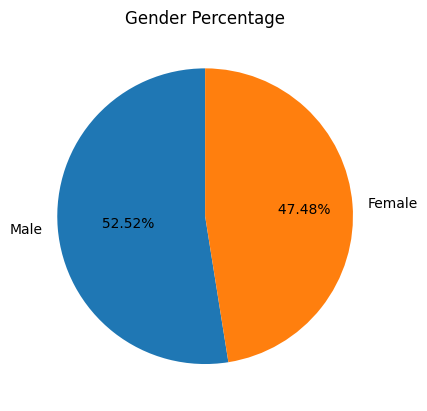

In [207]:
gender_counts = df['Gender'].value_counts()
gender_percentage = gender_counts / gender_counts.sum() * 100

plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%10.2f%%', startangle=90)
plt.title("Gender Percentage")
plt.show()

<h3 style="color:#AC8968;">Step 4-2: Check Workout_Type VS Session_Duration </h3>

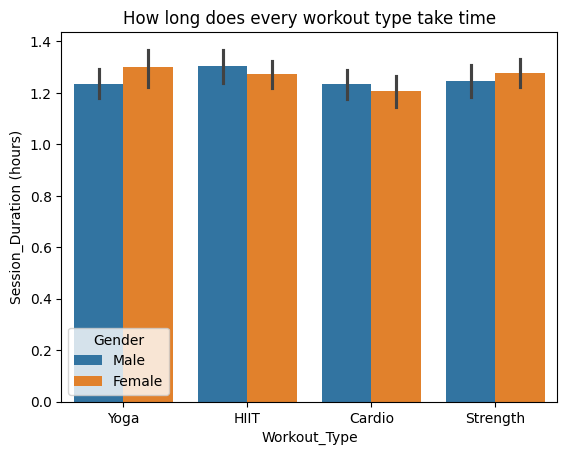

In [208]:
sns.barplot(x='Workout_Type', y='Session_Duration (hours)', data=df, hue='Gender')
plt.title('How long does every workout type take time')
plt.show()

<h3 style="color:#AC8968;">Step 4-3: Check Calories Burned VS Session_Duration </h3>

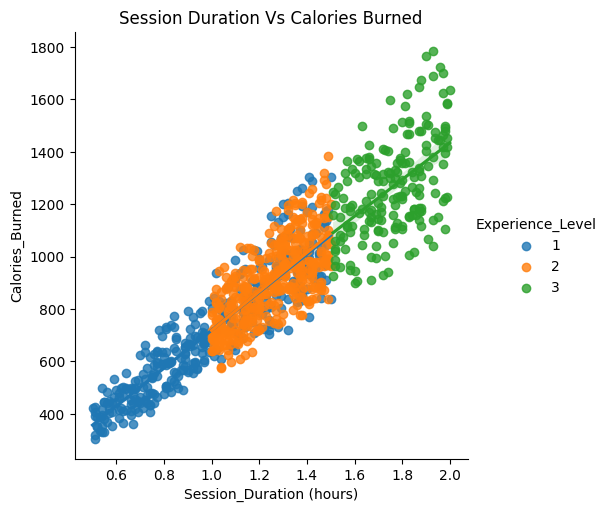

In [209]:
sns.lmplot( data=df , x="Session_Duration (hours)", y="Calories_Burned", hue="Experience_Level")
plt.title('Session Duration Vs Calories Burned')
plt.show()

<h3 style="color:#AC8968;">Step 4-4: Check Calories Burned, Session_Duration, Fat VS Experience Level </h3>

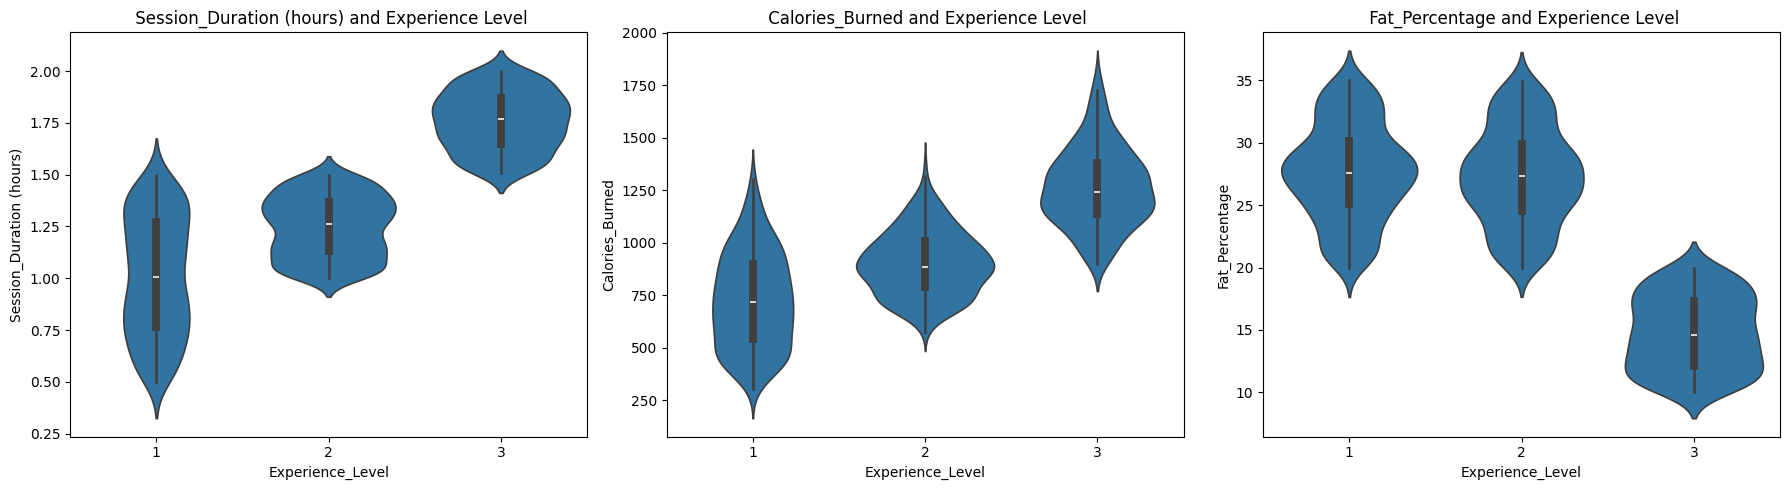

In [210]:

new = df[['Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage']]
plt.figure(figsize=(18, 5))  # Adjust the figure size as needed

for i, column in enumerate(new.columns, 1):  # Start index at 1 for subplot indexing
    plt.subplot(1, 3, i)  # Create a 1-row, 3-column grid and place each plot in a column
    plt.title(f" {column} and Experience Level")
    sns.violinplot(x="Experience_Level", y=column, data=df)

plt.tight_layout()
plt.show()

<h3 style="color:#AC8968;">Step 4-5: Correlation Matrix Of Numerical  </h3>

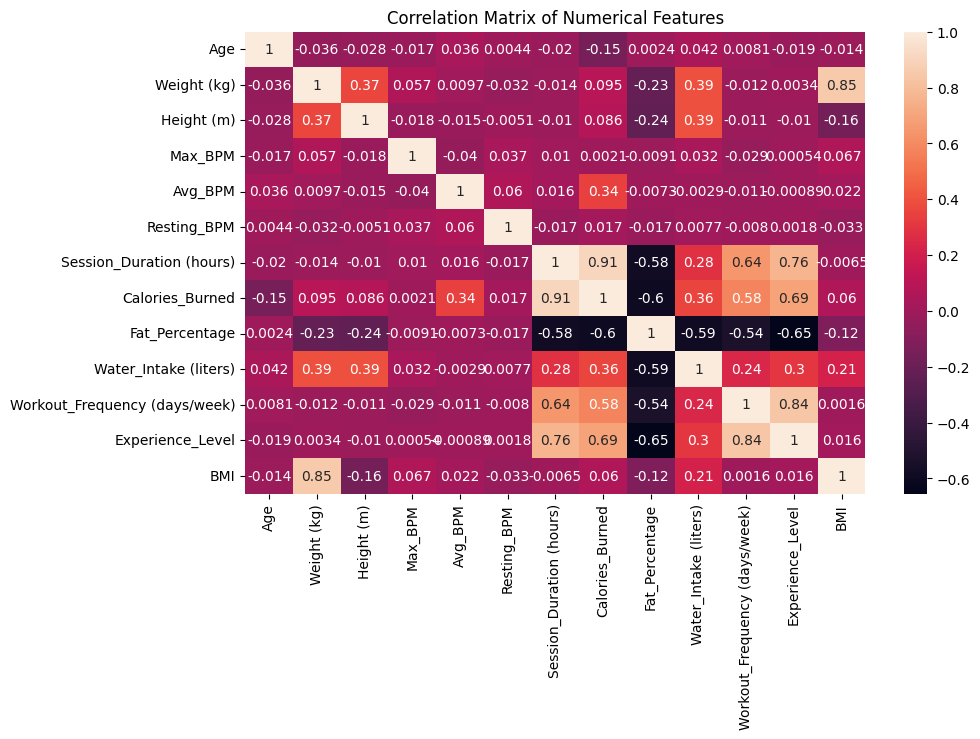

In [211]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

In [212]:
df.head(4)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

<h3 style="color:#AC8968;">Step 5-1: Label Encoding the 'Object' column</h3>

In [214]:
object = df.select_dtypes(include=['object'])

le = LabelEncoder()
for col in object:
    df[col] = le.fit_transform(df[col])

In [215]:
df.head(2)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.2
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.0


<h3 style="color:#AC8968;">Step 5-2: Drop Null Values</h3>

In [216]:
df.dropna(inplace=True)

<h3 style="color:#AC8968;">Step 5-3: Split the dataset into features (x) and target (y)</h3>

In [217]:
x = df.drop(columns=['Calories_Burned'])
y = df['Calories_Burned']

<h3 style="color:#AC8968;">Step 5-4: Split the dataset into training and testing sets</h3>

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h3 style="color:#AC8968;">Step 5-5: Check the processed data</h3>

In [219]:
print(x_train.shape), print(x_test.shape), print(y_train.shape), print(y_test.shape)

(778, 14)
(195, 14)
(778,)
(195,)


(None, None, None, None)

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 6 | Model Building</p>

<h3 style="color:#AC8968;">Step 6-1: Linear Regression</h3>


In [220]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 30.22
mean_squared_error : 1639.91
r2_score : 0.98


<h3 style="color:#AC8968;">Step 6-2: DecisionTree Regression</h3>


In [221]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth= 9, min_samples_leaf= 10, min_samples_split= 15)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 58.72
mean_squared_error : 6179.55
r2_score : 0.93


<h3 style="color:#AC8968;">Step 6-3: RandomForest Regression</h3>


In [222]:
model = RandomForestRegressor(n_estimators=150,max_depth= 12, min_samples_leaf= 10, min_samples_split= 8)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 48.77
mean_squared_error : 4136.05
r2_score : 0.95


<h3 style="color:#AC8968;">Step 6-4: GradientBoost Regression</h3>


In [223]:
gr = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth= 6,min_samples_leaf=10,min_samples_split=8)
gr.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 48.77
mean_squared_error : 4136.05
r2_score : 0.95


<h3 style="color:#AC8968;">Step 6-4: All Model Report</h3>


In [224]:
def evaluate_model(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'Model': model_name,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R2 Score': r2
    }

# List to store model evaluation results
results = []

# Evaluate each model and append results
results.append(evaluate_model(LinearRegression().fit(x_train, y_train), x_test, y_test, "Linear Regression"))
results.append(evaluate_model(DecisionTreeRegressor().fit(x_train, y_train), x_test, y_test, "Decision Tree Regressor"))
results.append(evaluate_model(RandomForestRegressor().fit(x_train, y_train), x_test, y_test, "Random Forest Regressor"))
results.append(evaluate_model(GradientBoostingRegressor().fit(x_train, y_train), x_test, y_test, "Gradient Boosting Regressor"))


results_df = pd.DataFrame(results)
print("\nModel Comparison:")
results_df



Model Comparison:


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,Linear Regression,30.216457,1639.910208,0.980343
1,Decision Tree Regressor,51.082051,4485.974359,0.946227
2,Random Forest Regressor,35.585179,2319.047140,0.972202
3,Gradient Boosting Regressor,15.700442,466.563696,0.994407


In [225]:
# Saving the model, scaler, and encoder to disk
import pickle

# Save the GradientBoosting model
pickle.dump(gr, open('F:/Projects/Gym/gr.pkl', 'wb'))


